### 处理分钟级数据 

按某个价格提取成为一个以股票代码成列 时间成行的二维df

In [28]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

root = "/mnt/datadisk/pjluo_shared/minute_h5_data/20171102.h5"
df = pd.read_hdf(root)
df

,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver
InstrumentID,,,,,,,
SZ000001,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00
SZ000001,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00
SZ000001,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02
SZ000001,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03
SZ000001,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00
...,...,...,...,...,...,...,...
SH603999,14:56,9.18,9.18,9.19,9.18,12900.0,118451.00
SH603999,14:57,9.18,9.17,9.18,9.17,19600.0,179799.00
SH603999,14:58,9.17,9.17,9.18,9.17,27300.0,250443.00


In [5]:
df_reset = df.reset_index()
df_multi = df_reset.set_index(['InstrumentID', 'EndTime'])
df_multi

Open  Close   High    Low  LastVolume  LastTurnOver
InstrumentID EndTime                                                      
SZ000001     09:31    11.36  11.34  11.38  11.33    379300.0    4303682.00
             09:32    11.34  11.34  11.34  11.33    239900.0    2718841.00
             09:33    11.34  11.36  11.36  11.33    214494.0    2431434.02
             09:34    11.36  11.34  11.34  11.33    156091.0    1769884.03
             09:35    11.34  11.33  11.34  11.33    452600.0    5128897.00
...                     ...    ...    ...    ...         ...           ...
SH603999     14:56     9.18   9.18   9.19   9.18     12900.0     118451.00
             14:57     9.18   9.17   9.18   9.17     19600.0     179799.00
             14:58     9.17   9.17   9.18   9.17     27300.0     250443.00
             14:59     9.17   9.18   9.18   9.17     39500.0     362293.00
             15:00     9.18   9.17   9.18   9.17     18500.0     169719.00

[774960 rows x 6 columns]

In [7]:
type = 'Open'
df_unstack = df_multi[type].unstack().T
df_unstack

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ300705,SZ300706,SZ300707,SZ300708,SZ300709,SZ300710,SZ300711,SZ300712,SZ300713,SZ300715
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,12.52,14.20,6.34,18.15,5.85,42.33,2.63,6.75,12.92,9.03,...,35.51,80.00,66.00,14.05,96.50,55.09,13.22,20.59,63.82,29.0
09:32,12.53,14.18,6.31,18.15,5.84,42.40,2.62,6.73,12.93,9.03,...,35.44,80.70,65.80,14.05,96.31,55.09,13.22,20.59,63.82,29.0
09:33,12.54,14.19,6.31,18.15,5.82,42.53,2.63,6.73,13.06,9.02,...,35.60,81.89,65.21,14.05,96.85,55.09,13.22,20.59,63.82,29.0
09:34,12.53,14.19,6.32,18.16,5.80,42.56,2.63,6.72,13.03,9.02,...,35.80,81.40,65.50,14.05,96.65,55.09,13.22,20.59,63.82,29.0
09:35,12.54,14.20,6.32,18.15,5.80,42.57,2.62,6.73,13.04,9.01,...,35.51,81.35,64.22,14.05,96.84,55.09,13.22,20.59,63.82,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,12.55,14.12,6.26,18.24,5.78,42.64,2.58,6.73,12.94,9.00,...,36.85,79.62,62.80,14.05,95.36,55.09,13.22,20.59,63.82,29.0
14:57,12.54,14.12,6.26,18.24,5.78,42.60,2.59,6.73,12.94,8.99,...,36.85,79.22,62.71,14.05,95.36,55.09,13.22,20.59,63.82,29.0
14:58,12.54,14.13,6.25,18.23,5.77,42.54,2.59,6.73,12.94,9.00,...,36.51,79.00,62.30,14.05,95.10,55.09,13.22,20.59,63.82,29.0


In [8]:
df_return = df_unstack.pct_change().fillna(0)
df_return

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ300705,SZ300706,SZ300707,SZ300708,SZ300709,SZ300710,SZ300711,SZ300712,SZ300713,SZ300715
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
09:32,0.000799,-0.001408,-0.004732,2.220446e-16,-0.001709,0.001654,-0.003802,-0.002963,0.000774,0.000000,...,-0.001971,0.008750,-0.003030,0.0,-0.001969,0.0,0.0,0.0,0.0,0.0
09:33,0.000798,0.000705,0.000000,0.000000e+00,-0.003425,0.003066,0.003817,0.000000,0.010054,-0.001107,...,0.004515,0.014746,-0.008967,0.0,0.005607,0.0,0.0,0.0,0.0,0.0
09:34,-0.000797,0.000000,0.001585,5.509642e-04,-0.003436,0.000705,0.000000,-0.001486,-0.002297,0.000000,...,0.005618,-0.005984,0.004447,0.0,-0.002065,0.0,0.0,0.0,0.0,0.0
09:35,0.000798,0.000705,0.000000,-5.506608e-04,0.000000,0.000235,-0.003802,0.001488,0.000767,-0.001109,...,-0.008101,-0.000614,-0.019542,0.0,0.001966,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,-0.000796,-0.000708,-0.001595,2.197802e-03,0.001733,0.000469,0.000000,0.000000,0.000000,0.000000,...,0.003540,-0.003504,0.001276,0.0,0.000840,0.0,0.0,0.0,0.0,0.0
14:57,-0.000797,0.000000,0.000000,0.000000e+00,0.000000,-0.000938,0.003876,0.000000,0.000000,-0.001111,...,0.000000,-0.005024,-0.001433,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
14:58,0.000000,0.000708,-0.001597,-5.482456e-04,-0.001730,-0.001408,0.000000,0.000000,0.000000,0.001112,...,-0.009227,-0.002777,-0.006538,0.0,-0.002727,0.0,0.0,0.0,0.0,0.0


In [12]:
df_signal = np.where(df_return > 0, 1, np.where(df_return < 0, -1, 0))
df_signal = pd.DataFrame(df_signal, index=df_return.index, columns=df_return.columns).shift(1).fillna(0)
df_signal

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ300705,SZ300706,SZ300707,SZ300708,SZ300709,SZ300710,SZ300711,SZ300712,SZ300713,SZ300715
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09:32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09:33,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0,...,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
09:34,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,0.0,1.0,-1.0,...,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
09:35,-1.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,1.0,-1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,...,0.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
14:57,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14:58,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_cash = df_signal * df_unstack
df_cash

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ300705,SZ300706,SZ300707,SZ300708,SZ300709,SZ300710,SZ300711,SZ300712,SZ300713,SZ300715
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
09:32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
09:33,12.54,-14.19,-6.31,18.15,-5.82,42.53,-2.63,-6.73,13.06,0.00,...,-35.60,81.89,-65.21,0.0,-96.85,0.0,0.0,0.0,0.0,0.0
09:34,12.53,14.19,0.00,0.00,-5.80,42.56,2.63,0.00,13.03,-9.02,...,35.80,81.40,-65.50,0.0,96.65,0.0,0.0,0.0,0.0,0.0
09:35,-12.54,0.00,6.32,18.15,-5.80,42.57,0.00,-6.73,-13.04,0.00,...,35.51,-81.35,64.22,0.0,-96.84,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,12.55,14.12,6.26,18.24,0.00,42.64,-2.58,0.00,12.94,0.00,...,0.00,79.62,-62.80,0.0,-95.36,0.0,0.0,0.0,0.0,0.0
14:57,-12.54,-14.12,-6.26,18.24,5.78,42.60,0.00,0.00,0.00,0.00,...,36.85,-79.22,62.71,0.0,95.36,0.0,0.0,0.0,0.0,0.0
14:58,-12.54,0.00,0.00,0.00,0.00,-42.54,2.59,0.00,0.00,-9.00,...,0.00,-79.00,-62.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [26]:
cash_cumsum = df_cash.sum(axis=1).cumsum()
cash_cumsum

EndTime
09:31         0.00
09:32         0.00
09:33    -13401.63
09:34    -13804.79
09:35    -16693.23
           ...    
14:56   -556955.05
14:57   -558865.36
14:58   -564632.89
14:59   -566755.51
15:00      1496.08
Length: 240, dtype: float64

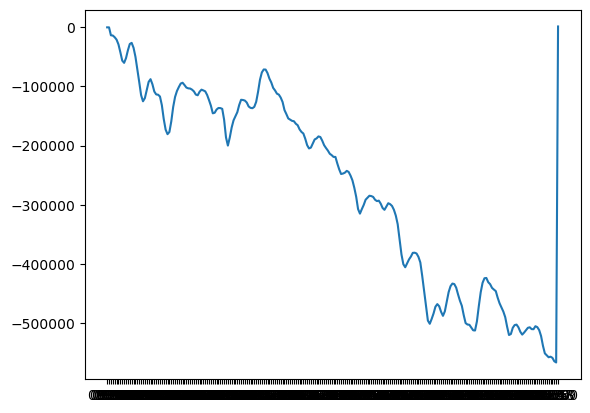

In [29]:
plt.plot(cash_cumsum.index, cash_cumsum)
plt.show()

In [18]:
df_signal.iloc[-1] = - df_signal[:-1].sum()
df_signal

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ300705,SZ300706,SZ300707,SZ300708,SZ300709,SZ300710,SZ300711,SZ300712,SZ300713,SZ300715
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09:32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09:33,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0,...,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
09:34,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,0.0,1.0,-1.0,...,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
09:35,-1.0,0.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,...,1.0,-1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,...,0.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
14:57,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14:58,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_res = df_return * df_signal
df_res

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ300705,SZ300706,SZ300707,SZ300708,SZ300709,SZ300710,SZ300711,SZ300712,SZ300713,SZ300715
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
09:32,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,0.0,-0.000000,0.0,0.0,0.0,0.0,0.0
09:33,0.000798,-0.000705,-0.000000,0.000000,0.003425,0.003066,-0.003817,-0.000000,0.010054,-0.000000,...,-0.004515,0.014746,0.008967,0.0,-0.005607,0.0,0.0,0.0,0.0,0.0
09:34,-0.000797,0.000000,0.000000,0.000000,0.003436,0.000705,0.000000,-0.000000,-0.002297,-0.000000,...,0.005618,-0.005984,-0.004447,0.0,-0.002065,0.0,0.0,0.0,0.0,0.0
09:35,-0.000798,0.000000,0.000000,-0.000551,-0.000000,0.000235,-0.000000,-0.001488,-0.000767,-0.000000,...,-0.008101,0.000614,-0.019542,0.0,-0.001966,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,-0.000796,-0.000708,-0.001595,0.002198,0.000000,0.000469,-0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.003504,-0.001276,0.0,-0.000840,0.0,0.0,0.0,0.0,0.0
14:57,0.000797,-0.000000,-0.000000,0.000000,0.000000,-0.000938,0.000000,0.000000,0.000000,-0.000000,...,0.000000,0.005024,-0.001433,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
14:58,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.001408,0.000000,0.000000,0.000000,-0.001112,...,-0.000000,0.002777,0.006538,0.0,-0.000000,0.0,0.0,0.0,0.0,0.0


In [43]:
import os
import re
from pathlib import Path

folder_root = '/mnt/datadisk/pjluo_shared/minute_h5_data/'
folder = Path(folder_root)
f_names = [f.name for f in folder.iterdir() if f.is_file() and f.name.endswith('.h5')]
f_2021 = [f for f in f_names if f.startswith('2021')]
f_2021.sort(key=lambda x: int(x[:8]))
f_2021

['20210104.h5',
 '20210105.h5',
 '20210106.h5',
 '20210107.h5',
 '20210108.h5',
 '20210111.h5',
 '20210112.h5',
 '20210113.h5',
 '20210114.h5',
 '20210115.h5',
 '20210118.h5',
 '20210119.h5',
 '20210120.h5',
 '20210121.h5',
 '20210122.h5',
 '20210125.h5',
 '20210126.h5',
 '20210127.h5',
 '20210128.h5',
 '20210129.h5',
 '20210201.h5',
 '20210202.h5',
 '20210203.h5',
 '20210204.h5',
 '20210205.h5',
 '20210208.h5',
 '20210209.h5',
 '20210210.h5',
 '20210218.h5',
 '20210219.h5',
 '20210222.h5',
 '20210223.h5',
 '20210224.h5',
 '20210225.h5',
 '20210226.h5',
 '20210301.h5',
 '20210302.h5',
 '20210303.h5',
 '20210304.h5',
 '20210305.h5',
 '20210308.h5',
 '20210309.h5',
 '20210310.h5',
 '20210311.h5',
 '20210312.h5',
 '20210315.h5',
 '20210316.h5',
 '20210317.h5',
 '20210318.h5',
 '20210319.h5',
 '20210322.h5',
 '20210323.h5',
 '20210324.h5',
 '20210325.h5',
 '20210326.h5',
 '20210329.h5',
 '20210330.h5',
 '20210331.h5',
 '20210401.h5',
 '20210402.h5',
 '20210406.h5',
 '20210407.h5',
 '202104

In [74]:
from tqdm.notebook import tqdm
df_dic = {}
for f in tqdm(f_2021):
    df = pd.read_hdf(folder_root + f)
    df_reset = df.reset_index()
    df_multi = df_reset.set_index(['InstrumentID', 'EndTime'])
    df_dic[f[:8]] = df_multi

  0%|          | 0/243 [00:00<?, ?it/s]

In [75]:
df_dic

{'20210104':                        Open  Close   High    Low  LastVolume  LastTurnOver
 InstrumentID EndTime                                                      
 SZ000001     09:31    19.10  18.90  19.10  18.82   3155510.0  5.985541e+07
              09:32    18.90  18.80  18.90  18.78   1791334.0  3.374590e+07
              09:33    18.80  18.84  18.85  18.81   1656900.0  3.119014e+07
              09:34    18.84  18.67  18.82  18.65   2376914.0  4.453555e+07
              09:35    18.67  18.57  18.65  18.50   2616000.0  4.863190e+07
 ...                     ...    ...    ...    ...         ...           ...
 SH689009     14:56    88.46  88.50  88.50  88.42     38656.0  3.420148e+06
              14:57    88.50  88.35  88.50  88.20    101104.0  8.927488e+06
              14:58    88.35  88.35  88.35  88.35         0.0  0.000000e+00
              14:59    88.35  88.35  88.35  88.35         0.0  0.000000e+00
              15:00    88.35  88.20  88.35  88.20    152923.0  1.348781e+07


In [76]:
open_2021 = pd.concat(df_dic.values(), keys=df_dic.keys())
open_2021

Open  Close   High    Low  LastVolume  \
         InstrumentID EndTime                                           
20210104 SZ000001     09:31    19.10  18.90  19.10  18.82   3155510.0   
                      09:32    18.90  18.80  18.90  18.78   1791334.0   
                      09:33    18.80  18.84  18.85  18.81   1656900.0   
                      09:34    18.84  18.67  18.82  18.65   2376914.0   
                      09:35    18.67  18.57  18.65  18.50   2616000.0   
...                              ...    ...    ...    ...         ...   
20211231 SH689009     14:56    70.05  70.08  70.18  70.06     13615.0   
                      14:57    70.08  70.08  70.08  70.06      7323.0   
                      14:58    70.08  70.08  70.08  70.08         0.0   
                      14:59    70.08  70.08  70.08  70.08         0.0   
                      15:00    70.08  70.07  70.08  70.07     21404.0   

                               LastTurnOver  
         InstrumentID EndTime                
20210104 SZ000001     09:31     59855405.18  
                      09:32     33745895.32  
                      09:33     31190135.00  
                      09:34     44535547.45  
                      09:35     48631903.70  
...                                     ...  
20211231 SH689009     14:56       954237.09  
                      14:57       513173.86  
                      14:58            0.00  
                      14:59            0.00  
                      15:00      1499778.28  

[254119680 rows x 6 columns]

In [77]:
open_2021.index.names = ['Date','InstrumentID', 'EndTime']

In [78]:
open_2021

Open  Close   High    Low  LastVolume  \
Date     InstrumentID EndTime                                           
20210104 SZ000001     09:31    19.10  18.90  19.10  18.82   3155510.0   
                      09:32    18.90  18.80  18.90  18.78   1791334.0   
                      09:33    18.80  18.84  18.85  18.81   1656900.0   
                      09:34    18.84  18.67  18.82  18.65   2376914.0   
                      09:35    18.67  18.57  18.65  18.50   2616000.0   
...                              ...    ...    ...    ...         ...   
20211231 SH689009     14:56    70.05  70.08  70.18  70.06     13615.0   
                      14:57    70.08  70.08  70.08  70.06      7323.0   
                      14:58    70.08  70.08  70.08  70.08         0.0   
                      14:59    70.08  70.08  70.08  70.08         0.0   
                      15:00    70.08  70.07  70.08  70.07     21404.0   

                               LastTurnOver  
Date     InstrumentID EndTime                
20210104 SZ000001     09:31     59855405.18  
                      09:32     33745895.32  
                      09:33     31190135.00  
                      09:34     44535547.45  
                      09:35     48631903.70  
...                                     ...  
20211231 SH689009     14:56       954237.09  
                      14:57       513173.86  
                      14:58            0.00  
                      14:59            0.00  
                      15:00      1499778.28  

[254119680 rows x 6 columns]

In [80]:
open_2021['Close'].to_hdf('all_2021.h5', key='df')

In [53]:
def open_return(df):
    df_reset = df.reset_index()
    df_multi = df_reset.set_index(['InstrumentID', 'EndTime'])
    type = 'Open'
    df_unstack = df_multi[type].unstack().T
    df_return = df_unstack.pct_change().fillna(0)
    df_signal = np.where(df_return > 0, 1, np.where(df_return < 0, -1, 0))
    df_signal = pd.DataFrame(df_signal, index=df_return.index, columns=df_return.columns).shift(1).fillna(0)
    df_cash = df_signal * df_unstack
    cash_cumsum = df_cash.sum(axis=1).cumsum()

    return cash_cumsum

In [54]:
open_yield = pd.DataFrame()
for date in df_dic.keys():
    open_yield[date] = open_return(df_dic[date])


/tmp/ipykernel_2397683/325596839.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  open_yield[date] = open_return(df_dic[date])
/tmp/ipykernel_2397683/325596839.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  open_yield[date] = open_return(df_dic[date])
/tmp/ipykernel_2397683/325596839.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

In [55]:
open_yield

,20210104,20210105,20210106,20210107,20210108,20210111,20210112,20210113,20210114,20210115,...,20211220,20211221,20211222,20211223,20211224,20211227,20211228,20211229,20211230,20211231
EndTime,,,,,,,,,,,,,,,,,,,,,
09:31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
09:32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
09:33,10630.39,-11240.16,7296.64,-16458.16,11976.82,-4928.58,34.50,299.49,-5078.27,3760.41,...,24260.08,23623.47,15998.80,-22722.50,2230.76,1397.37,23901.91,-20173.59,21431.12,11830.78
09:34,13131.89,5322.19,16792.23,-12461.32,2289.37,-34518.98,22198.86,-22547.10,-4829.95,-1178.79,...,51003.46,59211.46,7349.91,-49855.56,-2667.11,30793.16,37592.90,-65796.97,48992.62,-10180.85
09:35,13579.28,15258.85,16055.51,-40957.71,-18529.98,-50335.62,62057.95,-41539.98,-7880.17,13053.36,...,45740.41,56357.19,-24637.78,-60738.07,-38853.24,8299.66,30303.68,-91089.66,18013.09,-46387.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14:56,27447.56,-200855.76,-944094.24,-1011641.64,-920444.82,-1184169.87,96955.75,-1106524.40,-610742.01,-212299.56,...,-2026218.15,-366532.77,-866305.47,-1005531.18,-1798042.98,-875868.44,-474676.43,-1151762.71,-499971.92,-831728.55
14:57,34983.67,-192592.16,-940535.19,-995251.83,-911780.37,-1184618.59,112571.93,-1097436.60,-611284.40,-214794.23,...,-2035391.75,-362819.09,-861169.21,-1009097.37,-1809292.03,-873072.20,-476682.17,-1164150.57,-512729.92,-830540.29
14:58,50935.65,-176085.94,-938665.05,-989513.22,-896679.35,-1184218.19,128852.26,-1092420.24,-598481.22,-207309.76,...,-2023740.06,-347715.49,-848002.18,-1003728.39,-1810642.84,-852032.31,-456471.29,-1163098.30,-514337.19,-826604.38


In [81]:
df = pd.read_hdf('/mnt/datadisk2/aglv/aglv/lab_aglv/close_2021.h5')
df